In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
print("Pandas version used: " + pd.__version__)
print("Seaborn version used: " + sns.__version__)
print("Matplotlib version used: " + plt.matplotlib.__version__)

Pandas version used: 1.0.5
Seaborn version used: 0.10.1
Matplotlib version used: 3.2.2


In [3]:
# Read the dataset into a pandas dataframe:
stu_perf_df = pd.read_csv('../Datasets/StudentsPerformance.csv')

In [4]:
# Look at the first few rows of the dataset:
stu_perf_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Look at some information about the dataset, how many rows, and what data types:
stu_perf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# Check to see if there are any null values:
stu_perf_df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [26]:
# Make sure we have expected values for the feature columns and that there's nothing out of the ordinary:
# For each column, print out the column header and all of the distinct values within it:
for col in stu_perf_df.columns:
    print(str(col) + ":\n" + str(stu_perf_df[col].unique()))

sex:
['female' 'male']
ethnicity:
['group B' 'group C' 'group A' 'group D' 'group E']
parent_ed:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch:
['standard' 'free/reduced']
test_prep:
['none' 'completed']
math_score:
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading_score:
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
writing_score:
[ 74  88  93  44  75  78  92  39  67  50  52  43  73  70  58 

<h3>Thankfully there are no null values and all of the inputs match the expectations of their respective columns. Now to give the columns better names and then work on visualizing some of the data in its raw form before performing one-hot encoding for the categorical features:

<h3>The index has no name and some of the column names are too long or include spaces which will make things difficult. These will need to be renamed along with several other changes:

In [27]:
# Let's give the index a name ('stu_id') and then shorten some of the column names and add
# underscores to the ones that need them:
stu_perf_df.index.name = 'stu_id'
stu_perf_df.rename(columns={'gender':'sex',
                            'race/ethnicity':'ethnicity',
                            'parental level of education':'parent_ed',
                            'test preparation course':'test_prep',
                            'math score':'math_score',
                            'reading score':'reading_score',
                            'writing score':'writing_score'}, inplace=True)

<h3>I also want to create an average_score column that will serve as the main target variable. We can then look to see if individual subject scores are better predicted by these features later:

In [9]:
# Add the math, reading, and writing scores together and then divide them by 3 to get an average total score:
stu_perf_df['avg_score'] = ((stu_perf_df['math_score'] + stu_perf_df['reading_score'] + stu_perf_df['writing_score'])/3)

# Round the Avg. Score to just 2 decimal places. Assuming precision beyond 2 digits is not useful and rather just confusing:
stu_perf_df.avg_score = stu_perf_df.avg_score.round(2)

In [25]:
# Let's make sure the avg_score column turned out properly:
stu_perf_df.head()

,sex,ethnicity,parent_ed,lunch,test_prep,math_score,reading_score,writing_score,avg_score
stu_id,,,,,,,,,
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


<h3>The columns are in much better shape, so now to begin visualizing some of the raw data:

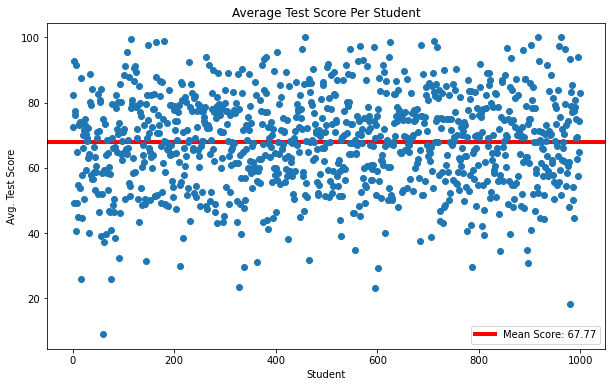

In [29]:
# Let's begin with a scatterplot of the average test score and a line showing the mean:
fig = plt.subplots(figsize=(10,6))
x = stu_perf_df.index
y = stu_perf_df['avg_score']
plt.title('Average Test Score Per Student')
# Draw a line at the mean of the avg_score
plt.axhline(y=y.mean(), c='r', lw=4, label='Mean Score: ' + str(round(y.mean(), 2)))
plt.legend()
plt.xlabel('Student')
plt.ylabel('Avg. Test Score')
plt.plot(x, y, 'o')

<h3>The mean of the average test scores is 67.77. At least most of the students seem to have passed. Now for each individual subject:

Text(0.5, 1.0, 'Writing Scores for All Students')

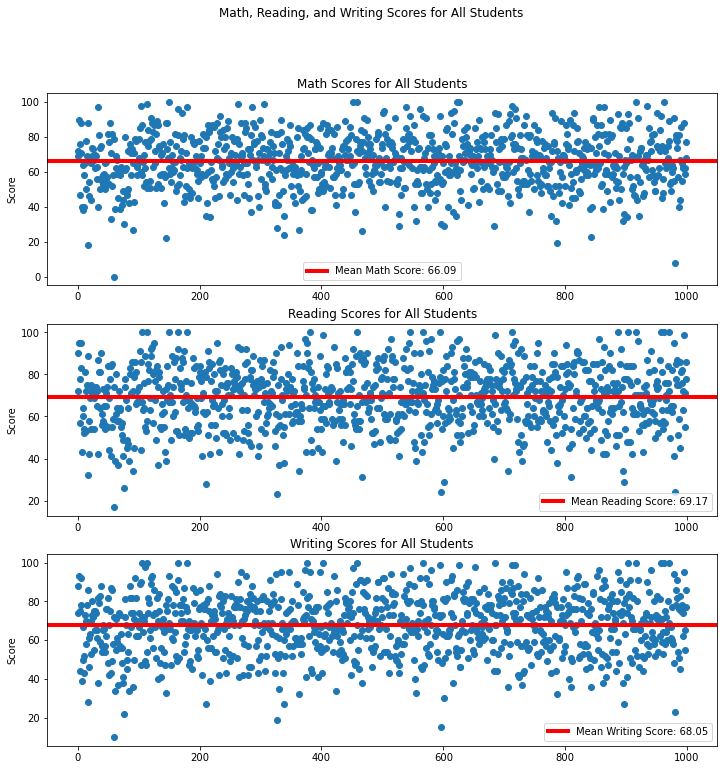

In [31]:
# Build a figure that shows all 3 scores (Math, Reading, and Writing) together along with their respective means:

# Create the variables to represent the 'y' axis of each respective graph:
m = stu_perf_df['math_score']
r = stu_perf_df['reading_score']
w = stu_perf_df['writing_score']

# Generate the subplots and figure aspects:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,12))
fig.suptitle('Math, Reading, and Writing Scores for All Students')
ax1.plot(x, m, 'o')
ax1.axhline(y=m.mean(), c='r', lw=4, label='Mean Math Score: ' + str(round(m.mean(), 2)))
ax1.legend()
ax1.set_ylabel('Score')
ax1.set_title('Math Scores for All Students')
ax2.plot(x, r, 'o')
ax2.axhline(y=r.mean(), c='r', lw=4, label='Mean Reading Score: ' + str(round(r.mean(), 2)))
ax2.legend()
ax2.set_ylabel('Score')
ax2.set_title('Reading Scores for All Students')
ax3.plot(x, w, 'o')
ax3.axhline(y=w.mean(), c='r', lw=4, label='Mean Writing Score: ' + str(round(w.mean(), 2)))
ax3.legend()
ax3.set_ylabel('Score')
ax3.set_title('Writing Scores for All Students')

<h3>The mean score for the Math test was the lowest (66.09) while the mean score for the Reading test was highest (69.17). The mean for the writing test was 68.05. Now to look at what factors seem to contribute to higher or lower test scores:

<h3>Each of the features need to be explored thoroughly, as intuitively any of them could have an impact on the test scores, even if not directly. For example, the ethnicity and lunch features might indicate a socioeconomic impact on test scores.

Text(0.5, 1.0, 'Average Total Test Score vs. Ethnicity and Sex')

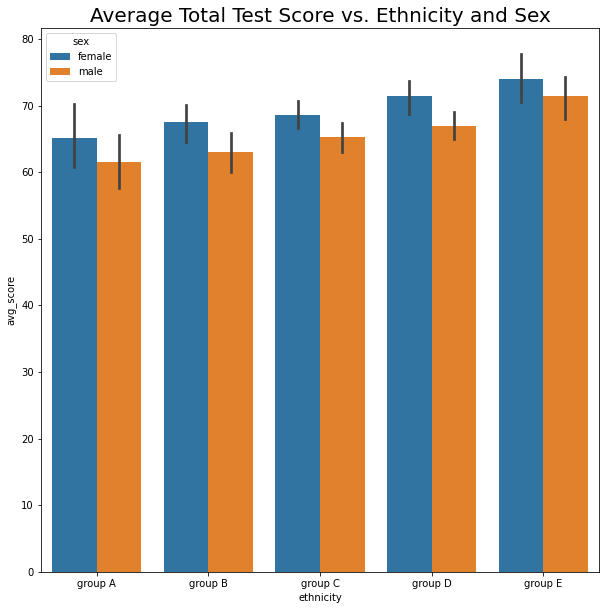

In [11]:
fig = plt.subplots(figsize=(10,10))
# Add gender as a hue using the sex_female dummy variable. 0 is male, 1 is female:
sns.barplot(x ='ethnicity',
            y ='avg_score',
            data = stu_perf_df,
            order = ['group A', 'group B', 'group C', 'group D', 'group E'],
            hue='sex')
plt.title("Average Total Test Score vs. Ethnicity and Sex", fontdict={'fontsize':20})

<h3>

Text(0.5, 1.0, 'Average Total Score vs. Ethnicity and Lunch Status')

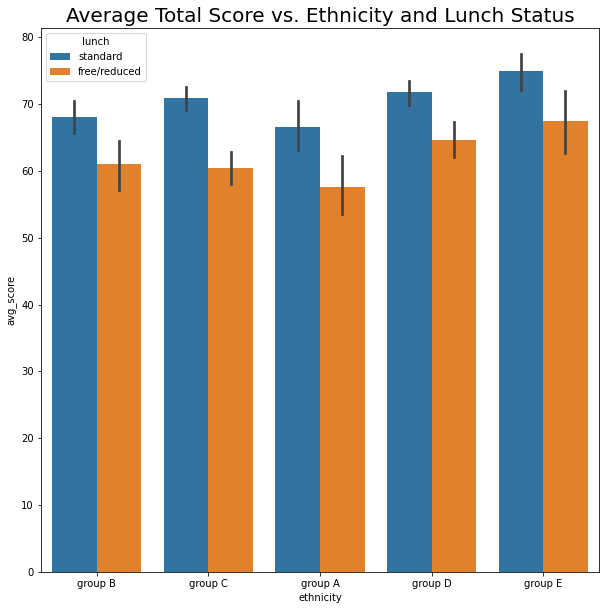

In [12]:
fig = plt.subplots(figsize=(10,10))
# Add gender as a hue using the sex_female dummy variable. 0 is male, 1 is female:
sns.barplot(x ='ethnicity', y ='avg_score', data = stu_perf_df, hue='lunch')
plt.title("Average Total Score vs. Ethnicity and Lunch Status", fontdict={'fontsize':20})

Text(0.5, 1.0, 'Average Total Score vs. Parental Education and Sex')

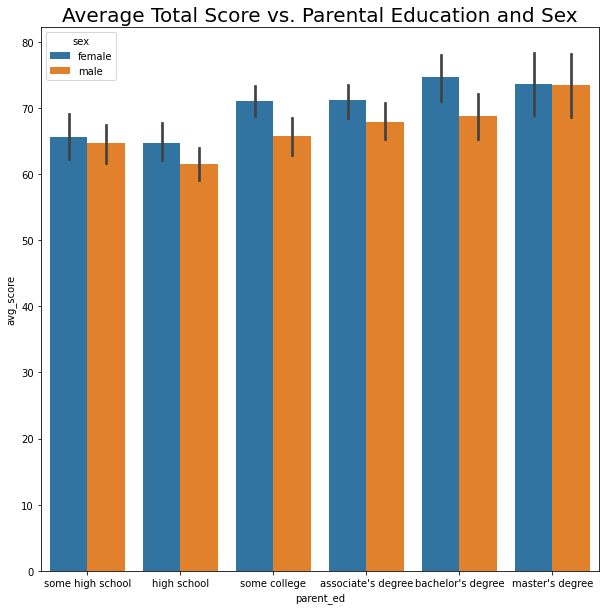

In [13]:

fig = plt.subplots(figsize=(10,10))
sns.barplot(x='parent_ed',
            y='avg_score',
            order=['some high school', 'high school', 'some college', 'associate\'s degree',
                   'bachelor\'s degree', 'master\'s degree'],
            data=stu_perf_df,
            hue='sex')
plt.title("Average Total Score vs. Parental Education and Sex", fontdict={'fontsize':20})

Text(0.5, 1.0, 'Average Total Score vs. Parental Education and Lunch Status')

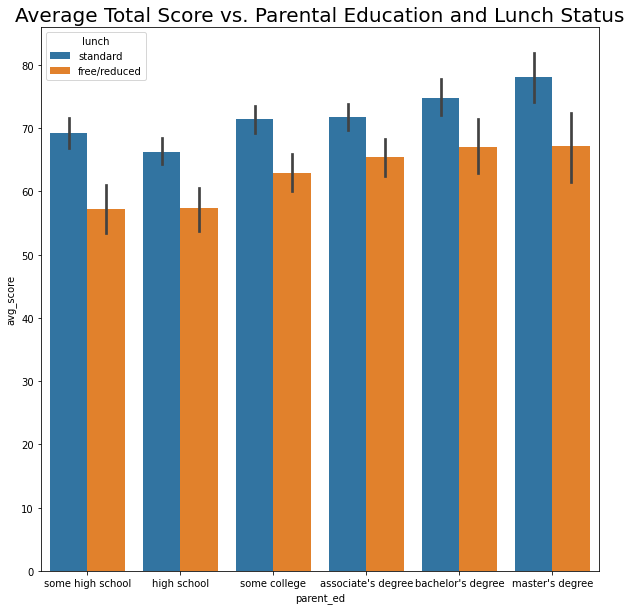

In [14]:
fig = plt.subplots(figsize=(10,10))
sns.barplot(x='parent_ed',
            y='avg_score',
            order=['some high school', 'high school', 'some college', 'associate\'s degree',
                   'bachelor\'s degree', 'master\'s degree'],
            data=stu_perf_df,
            hue='lunch')
plt.title("Average Total Score vs. Parental Education and Lunch Status", fontdict={'fontsize':20})

In [15]:
# Take a look at our new column names and start looking at what other transformations we can make to better use the columns
# as features for our model:
stu_perf_df.head()

,sex,ethnicity,parent_ed,lunch,test_prep,math_score,reading_score,writing_score,avg_score
stu_id,,,,,,,,,
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


<h3>All of these columns except the test reults should be turned into dummy variables in order to make them machine readable:

In [16]:
# Generate dummy columns for one-hot encoding for sex, ethnicity, parent_ed, lunch, and test_prep:
stu_perf_df_cln = pd.get_dummies(stu_perf_df, columns=['sex', 'ethnicity', 'parent_ed', 'lunch', 'test_prep'])
stu_perf_df_cln.head()

,math_score,reading_score,writing_score,avg_score,sex_female,sex_male,ethnicity_group A,ethnicity_group B,ethnicity_group C,ethnicity_group D,...,parent_ed_associate's degree,parent_ed_bachelor's degree,parent_ed_high school,parent_ed_master's degree,parent_ed_some college,parent_ed_some high school,lunch_free/reduced,lunch_standard,test_prep_completed,test_prep_none
stu_id,,,,,,,,,,,,,,,,,,,,,
0,72,72,74,72.67,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,69,90,88,82.33,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
2,90,95,93,92.67,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
3,47,57,44,49.33,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,76,78,75,76.33,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1


In [17]:
# Now we can drop several of the extra columns that are unnecessary:
stu_perf_df_cln.drop(axis=1, columns=['sex_male', 'ethnicity_group E', 'parent_ed_some high school',
                          'lunch_free/reduced', 'test_prep_none'], inplace=True)

In [18]:
# Take a look at the remaining columns to get an idea of how we can improve their names, etc:
stu_perf_df_cln.columns

Index(['math_score', 'reading_score', 'writing_score', 'avg_score',
       'sex_female', 'ethnicity_group A', 'ethnicity_group B',
       'ethnicity_group C', 'ethnicity_group D',
       'parent_ed_associate's degree', 'parent_ed_bachelor's degree',
       'parent_ed_high school', 'parent_ed_master's degree',
       'parent_ed_some college', 'lunch_standard', 'test_prep_completed'],
      dtype='object')

In [19]:
# Shorten virtually all of the column names to be easier to read:
stu_perf_df_cln.rename(columns={'sex_female':'female', 'ethnicity_group A':'eth_A', 'ethnicity_group B':'eth_B',
                            'ethnicity_group C':'eth_C', 'ethnicity_group D':'eth_D',
                            'parent_ed_associate\'s degree':'p_ed_assc', 'parent_ed_bachelor\'s degree':'p_ed_bach',
                            'parent_ed_master\'s degree':'p_ed_mast', 'parent_ed_some college':'p_ed_som_col',
                            'parent_ed_high school':'p_ed_hs', 'lunch_standard':'std_lunch',
                            'test_prep_completed':'test_prep'}, inplace=True)

<h3>The features are a lot more managable now and will be legible to the ML models.

In [20]:
list(stu_perf_df_cln.columns)

['math_score',
 'reading_score',
 'writing_score',
 'avg_score',
 'female',
 'eth_A',
 'eth_B',
 'eth_C',
 'eth_D',
 'p_ed_assc',
 'p_ed_bach',
 'p_ed_hs',
 'p_ed_mast',
 'p_ed_som_col',
 'std_lunch',
 'test_prep']

In [21]:
# Reorder the columns to be a little cleaner. Put p_ed in order of increasing education and move scores to right side of DF:
stu_perf_df_cln = stu_perf_df_cln[[
 'female',
 'eth_A',
 'eth_B',
 'eth_C',
 'eth_D',
 'p_ed_hs',
 'p_ed_som_col',
 'p_ed_assc',
 'p_ed_bach',
 'p_ed_mast',
 'std_lunch',
 'test_prep',
 'math_score',
 'reading_score',
 'writing_score',
 'avg_score']]

In [22]:
# Make sure our final, cleaned up dataset looks good:
stu_perf_df_cln.head(10)

,female,eth_A,eth_B,eth_C,eth_D,p_ed_hs,p_ed_som_col,p_ed_assc,p_ed_bach,p_ed_mast,std_lunch,test_prep,math_score,reading_score,writing_score,avg_score
stu_id,,,,,,,,,,,,,,,,
0,1,0,1,0,0,0,0,0,1,0,1,0,72,72,74,72.67
1,1,0,0,1,0,0,1,0,0,0,1,1,69,90,88,82.33
2,1,0,1,0,0,0,0,0,0,1,1,0,90,95,93,92.67
3,0,1,0,0,0,0,0,1,0,0,0,0,47,57,44,49.33
4,0,0,0,1,0,0,1,0,0,0,1,0,76,78,75,76.33
5,1,0,1,0,0,0,0,1,0,0,1,0,71,83,78,77.33
6,1,0,1,0,0,0,1,0,0,0,1,1,88,95,92,91.67
7,0,0,1,0,0,0,1,0,0,0,0,0,40,43,39,40.67
8,0,0,0,0,1,1,0,0,0,0,0,1,64,64,67,65.00


In [23]:
# Save the cleaned up, one-hot encoded dataframe into csv:
stu_perf_df_cln.to_csv('../Datasets/stu_perf_clean.csv')